In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# FIRST PART
# CODE WILL NOT RUN. THIS IS JUST FOR REFERENCE

In [2]:

df_wines = pd.read_csv("wineQualityReds.csv")
print(df_wines.head())
print(df_wines.isnull().sum())

   Wine  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0     1            7.4              0.70         0.00             1.9   
1     2            7.8              0.88         0.00             2.6   
2     3            7.8              0.76         0.04             2.3   
3     4           11.2              0.28         0.56             1.9   
4     5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65     

In [4]:
norm = Normalizer()

# df_t = pd.DataFrame(norm.transform(df_wines), columns=df_wines.columns)
df_ft = pd.DataFrame(norm.fit_transform(df_wines), columns=df_wines.columns)
df_ft

,Wine,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,0.026137,0.193412,0.018296,0.000000,0.049660,0.001986,0.287504,0.888648,0.026079,0.091740,0.014637,0.245685,0.130684
1,0.027423,0.106949,0.012066,0.000000,0.035650,0.001344,0.342784,0.918660,0.013667,0.043876,0.009324,0.134371,0.068557
2,0.051834,0.134767,0.013131,0.000691,0.039739,0.001590,0.259168,0.933006,0.017226,0.056326,0.011231,0.169323,0.086389
3,0.061885,0.173278,0.004332,0.008664,0.029395,0.001160,0.263012,0.928276,0.015440,0.048889,0.008973,0.151618,0.092828
4,0.129625,0.191845,0.018148,0.000000,0.049258,0.001970,0.285176,0.881452,0.025868,0.090997,0.014518,0.243696,0.129625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.999381,0.003885,0.000376,0.000050,0.001253,0.000056,0.020050,0.027569,0.000623,0.002162,0.000363,0.006579,0.003133
1595,0.999150,0.003694,0.000344,0.000063,0.001377,0.000039,0.024415,0.031928,0.000623,0.002204,0.000476,0.007012,0.003756
1596,0.999480,0.003943,0.000319,0.000081,0.001439,0.000048,0.018150,0.025034,0.000623,0.002140,0.000469,0.006884,0.003755
1597,0.999385,0.003690,0.000403,0.000075,0.001251,0.000047,0.020013,0.027517,0.000623,0.002233,0.000444,0.006379,0.003127


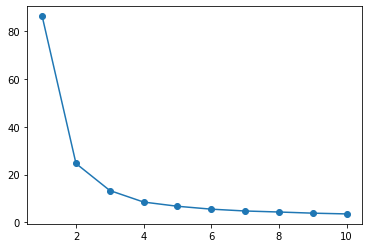

In [5]:
ks = range(1, 11)
inertias = []

for k in ks:
    model_kmeans = KMeans(n_clusters=k)
    model_kmeans.fit(df_ft)
    inertias.append(model_kmeans.inertia_)

plt.plot(ks, inertias, marker='o')
plt.savefig('wine_kmeans.png')

In [7]:
file_path = 'wineQualityReds.csv'
df_wines = pd.read_csv(file_path)
print(df_wines.head())

   Wine  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0     1            7.4              0.70         0.00             1.9   
1     2            7.8              0.88         0.00             2.6   
2     3            7.8              0.76         0.04             2.3   
3     4           11.2              0.28         0.56             1.9   
4     5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65     

[Text(0.5, 1.0, 'Quality Histogram')]

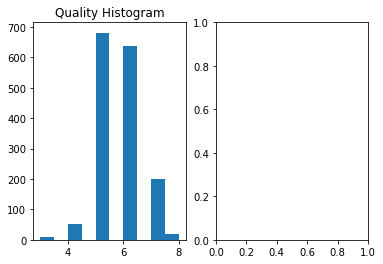

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(df_wines['quality'])
ax[0].set(title='Quality Histogram')

In [10]:
df_wines_grouped = df_wines.groupby('quality').mean()

print(df_wines_grouped)


                Wine  fixed.acidity  volatile.acidity  citric.acid  \
quality                                                              
3        1053.200000       8.360000          0.884500     0.171000   
4         796.981132       7.779245          0.693962     0.174151   
5         741.982379       8.167254          0.577041     0.243686   
6         847.423197       8.347179          0.497484     0.273824   
7         832.165829       8.872362          0.403920     0.375176   
8         826.722222       8.566667          0.423333     0.391111   

         residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
quality                                                                         
3              2.635000   0.122500            11.000000             24.900000   
4              2.694340   0.090679            12.264151             36.245283   
5              2.528855   0.092736            16.983847             56.513950   
6              2.477194   0.084956

In [12]:
df_wines_norm = (df_wines-df_wines.min())/(df_wines.max() - df_wines.min())

print(df_wines_norm.head())

       Wine  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0  0.000000       0.247788          0.397260         0.00        0.068493   
1  0.000626       0.283186          0.520548         0.00        0.116438   
2  0.001252       0.283186          0.438356         0.04        0.095890   
3  0.001877       0.584071          0.109589         0.56        0.068493   
4  0.002503       0.247788          0.397260         0.00        0.068493   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density        pH  \
0   0.106845             0.140845              0.098940  0.567548  0.606299   
1   0.143573             0.338028              0.215548  0.494126  0.362205   
2   0.133556             0.197183              0.169611  0.508811  0.409449   
3   0.105175             0.225352              0.190813  0.582232  0.330709   
4   0.106845             0.140845              0.098940  0.567548  0.606299   

   sulphates   alcohol  quality  
0   0.137725  0.153846      

In [13]:
df_wines_norm = (df_wines-df_wines.min())/(df_wines.max() - df_wines.min())
print(df_wines_norm.head())

       Wine  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0  0.000000       0.247788          0.397260         0.00        0.068493   
1  0.000626       0.283186          0.520548         0.00        0.116438   
2  0.001252       0.283186          0.438356         0.04        0.095890   
3  0.001877       0.584071          0.109589         0.56        0.068493   
4  0.002503       0.247788          0.397260         0.00        0.068493   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density        pH  \
0   0.106845             0.140845              0.098940  0.567548  0.606299   
1   0.143573             0.338028              0.215548  0.494126  0.362205   
2   0.133556             0.197183              0.169611  0.508811  0.409449   
3   0.105175             0.225352              0.190813  0.582232  0.330709   
4   0.106845             0.140845              0.098940  0.567548  0.606299   

   sulphates   alcohol  quality  
0   0.137725  0.153846      

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model_ac = AgglomerativeClustering(n_clusters=6)

model_ac.fit(df_wines_norm)

print(model_ac.labels_)

[1 1 1 ... 0 0 3]


In [23]:
ax[1].hist(model_ac.labels_)
ax[1].set(title='Clusters Histogram')



[Text(0.5, 1.0, 'Clusters Histogram')]

In [ ]:
df_wines_norm['Cluster'] = model_ac.labels_

In [18]:
print(df_wines_norm.groupby('Cluster').mean())


             Wine  fixed.acidity  volatile.acidity  citric.acid  \
Cluster                                                           
0        0.772178       0.200415          0.338350     0.097715   
1        0.277735       0.270077          0.350322     0.124652   
2        0.763924       0.279480          0.280394     0.252250   
3        0.696671       0.371580          0.157836     0.424444   
4        0.283310       0.360368          0.284623     0.355201   
5        0.278354       0.606788          0.195064     0.544485   

         residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
Cluster                                                                         
0              0.088513   0.105388             0.209554              0.104214   
1              0.093354   0.119799             0.155589              0.110958   
2              0.175407   0.124551             0.356514              0.249757   
3              0.099840   0.107126             0.186471   

In [19]:
print(df_wines.columns[0])

Wine


In [22]:
# print(df_wines.columns[0])
df_wines.drop(df_wines.columns[0],axis=1,inplace=True)
df_wines.drop('fixed.acidity',axis=1,inplace=True)
df_wines.drop(axis=1,inplace=True)

KeyError: "['fixed.acidity'] not found in axis"